In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Cargamos el dataset

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Eliminamos las columnas que no son predicturas

In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Creamos cageogoricas

In [6]:
df = pd.get_dummies(df, drop_first=True)

### Pequeña exploración de datos

In [7]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.852459,0.085610,0.777778
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.318713,0.087719,0.634503


In [8]:
del df['Sex_male']

Quitamos los NA's

In [9]:
df.isna().mean()

Survived      0.000000
Pclass        0.000000
Age           0.198653
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
dtype: float64

In [10]:
df.Age = df.Age.fillna(df.Age.mean())

### Crea un modelo 

In [11]:
target = 'Survived'
model = linear_model.LogisticRegression()
X = df.drop(target, axis=1)
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)


model.fit(X_train, y_train)

/Users/antoniomanguart/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicciones del modelo, cuales son los tipos que hay 

In [13]:
predicciones = model.predict(X_test)
probabilidades = model.predict_proba(X_test)
predicciones1 = [i[1] for i in probabilidades]

### Evalua el modelo

In [14]:
evaluacion = pd.DataFrame({
    'predicciones': predicciones,
    'probabilidades': predicciones1,
    'survived': y_test
})

In [63]:
evaluacion['bins'] = pd.qcut(evaluacion['probabilidades'], q=10, labels=False, duplicates='drop')

In [64]:
grouped = evaluacion.groupby('bins').mean()

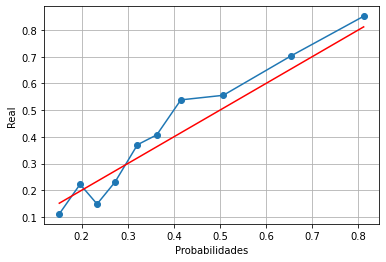

In [75]:
plt.plot(grouped.probabilidades, grouped.survived, marker="o")
plt.plot(grouped.probabilidades, grouped.probabilidades, color="red")
plt.xlabel("Probabilidades")
plt.ylabel("Real")
plt.grid()

### ¿Qué tanto le atina?

In [76]:
np.mean(evaluacion.predicciones == evaluacion.survived)

0.7238805970149254

Con sklearn 

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_pred=evaluacion.predicciones, y_true=evaluacion.survived)

0.7238805970149254

###  Histogramas 

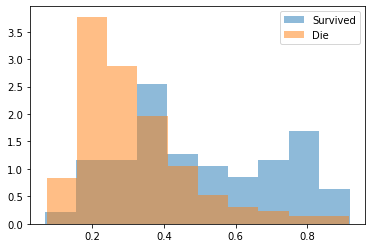

In [23]:
plt.hist(evaluacion.query("survived == True").probabilidades, alpha=0.5, bins=10, label="Survived", density=True)
plt.hist(evaluacion.query("survived != True").probabilidades, alpha=0.5, bins=10, label="Die", density=True)
plt.legend()
plt.show()

In [24]:
len(df)

891

### Usando statsmodel

In [34]:
import statsmodels.formula.api as smf
df = pd.read_csv('titanic.csv')

In [35]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [47]:
# Ajustamos la regresión logística
logit_model = smf.logit('Survived ~ Age + C(Sex) + SibSp + Parch + Fare + C(Embarked)', data=df)
result = logit_model.fit()

# Mostramos el resumen de la regresión
result.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.482194
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.1239,0.369,5.750,0.000,1.400,2.848
C(Sex)[T.male],-2.5558,0.209,-12.231,0.000,-2.965,-2.146
C(Embarked)[T.Q],-1.3741,0.573,-2.398,0.017,-2.497,-0.251
C(Embarked)[T.S],-0.5857,0.257,-2.279,0.023,-1.089,-0.082
Age,-0.0215,0.007,-2.961,0.003,-0.036,-0.007
SibSp,-0.3899,0.125,-3.113,0.002,-0.635,-0.144
Parch,-0.2148,0.119,-1.812,0.070,-0.447,0.018
Fare,0.0151,0.003,4.761,0.000,0.009,0.021
